In [37]:
import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, IBMQ, BasicAer, execute
from qiskit.quantum_info.random import random_unitary
from qiskit.tools.visualization import plot_histogram


In [38]:
def randoms_unitary(n):
    q = QuantumRegister(n)
    c = ClassicalRegister(n)
    quantum_circuit = QuantumCircuit(q, c)
    for i in range(quantum_circuit.n_qubits):
        quantum_circuit.h(i)
    if n%2 == 0:
        # set first layer gates
        for i in range(0, n, 2):
            quantum_circuit.append(random_unitary(4), [i, i+1])
        # set second layer gates
        for i in range(1, n-1, 2):
            quantum_circuit.append(random_unitary(4), [i, i+1])
            
    else:
        # set first layer gates
        for i in range(0, n-1, 2):
            quantum_circuit.append(random_unitary(4), [i, i+1])
        # set second layer gates
        for i in range(1, n, 2):
            quantum_circuit.append(random_unitary(4), [i, i+1])

    return quantum_circuit


In [39]:
%matplotlib inline

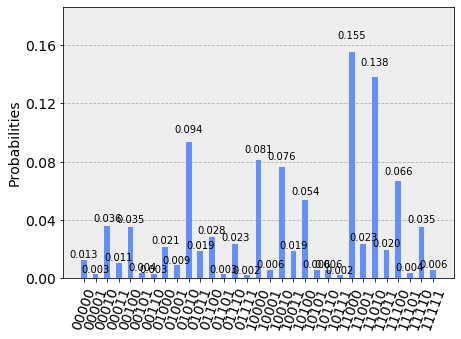

In [45]:
qc = randoms_unitary(5)
qc.measure(range(qc.n_qubits), range(qc.n_qubits))
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(qc, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

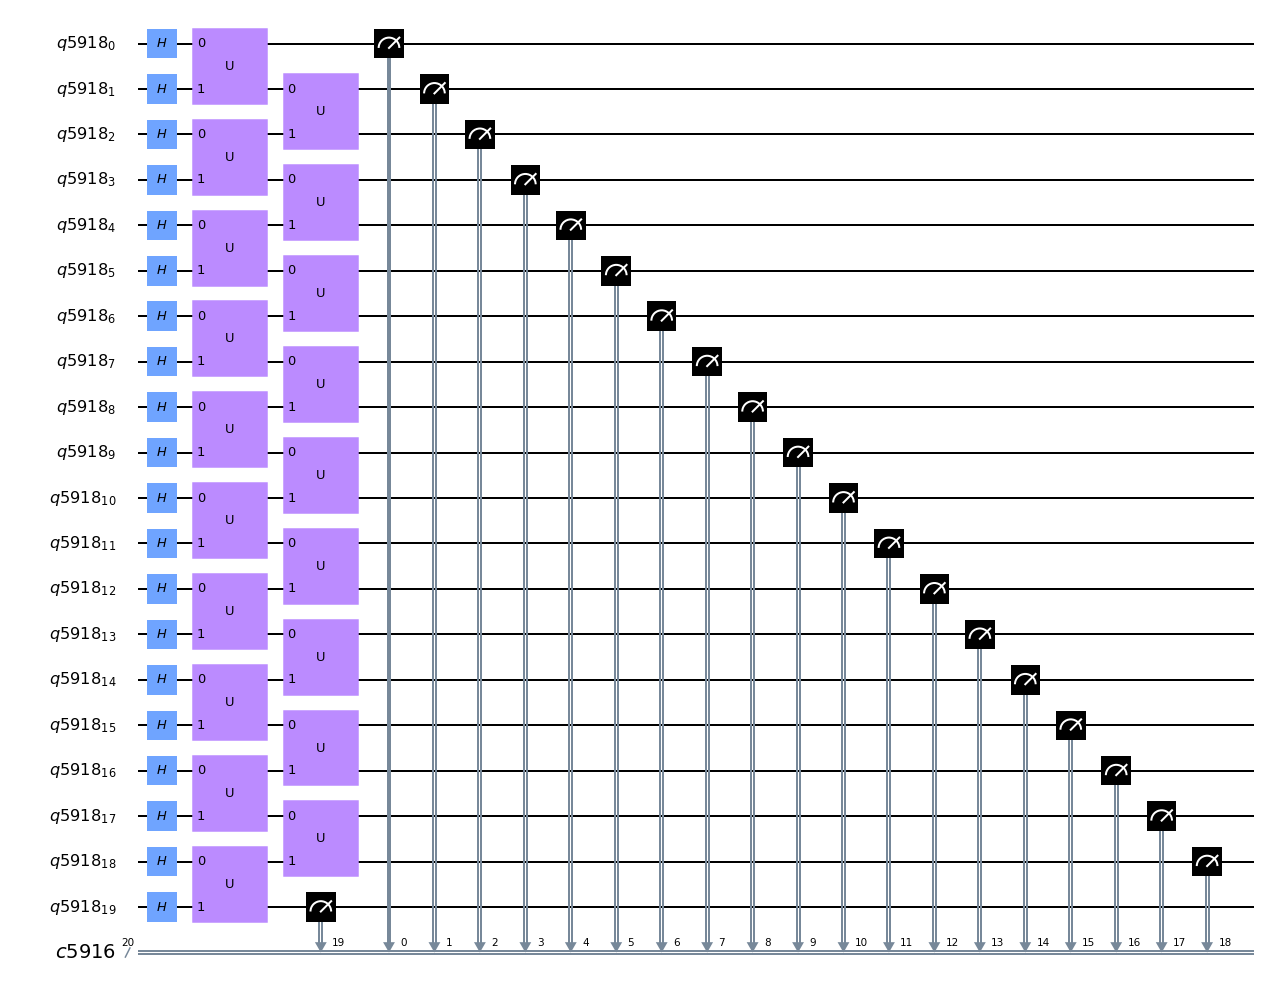

In [36]:
qc.draw(output = "mpl")